<a href="https://colab.research.google.com/github/budhathoki10/Concept_and_Technology_of_AI/blob/master/2501392_Kushal_Budhathoki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
download and install country_converter in our environment
'''
!pip install country_converter
!pip install pycountry
!pip install rapidfuzz

In [ ]:
'''
importing all the necessary librabries. here we are importing country_converter although the assignment didnt asked for it.
we import country_converter library to seperate the country on the basis of region
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco

In [ ]:
'''again rapid fuzz is imported to check spelling by comparing a given country name against a list of country for data cleaning'''
import pycountry
from rapidfuzz import process, fuzz

Problem 1

In [ ]:
dataframe= pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv",encoding="ISO-8859-1")
'''
displaying head,tail, info, and describe
'''

#dataframe.head()
#dataframe.tail()
#dataframe.describe()
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

In [ ]:
#1. Extract Latest Year:
'''
displaying unique years
'''

unique_year= dataframe["year"].unique()
print(f"the unique years are {unique_year}")

'''filtering the dataset to select the year= 2022
'''
hdi_2022_df= dataframe[dataframe['year']==2022].copy()
hdi_2022_df.head()


the unique years are [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [ ]:

#2. Data Exploration:

#2.1 Display the first 10 rows of the 2022 dataset.
print("displaying top 10 rows of 2022 dataset")
hdi_2022_df.head(10)
print("____________________________________________________________________")

#2.2 Count the number of rows and columns.
row= hdi_2022_df.shape[0]
coln= hdi_2022_df.shape[1]
print(f"there are {row} row and {coln} coln in dataframe")
print("____________________________________________________________________")

#2.3 List all column names and their data types.
print("\n Column names and types are:")
print(hdi_2022_df.dtypes)

print("____________________________________________________________________")


displaying top 10 rows of 2022 dataset
____________________________________________________________________
there are 206 row and 30 coln in dataframe
____________________________________________________________________

 Column names and types are:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_dev

3. Missing Values & Data Cleaning:

In [ ]:

#3. Missing Values & Data Cleaning:

#3.1 Check for missing values in each column and report total counts.
'''
check the missing values of columns a d displaying their sum
'''
print("total null values in each columns are:  ")
print(hdi_2022_df.isnull().sum())
print("____________________________________________________________________")


#3.2 Inspect dataset for


# #– special characters (e.g., “–”) representing missing data.
print((hdi_2022_df == "-").sum())

print("____________________________________________________________________")

#numeric columns stored as text
numeric_cols = ['hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

print("____________________________________________________________________")

total null values in each columns are:  
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41

In [ ]:
#inconsistent or misspelled country names

'''identifying the inconsistent Country name and dropping the column'''
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()
hdi_2022_df['country'].value_counts().head(10)
bad_values = [
    "Very high human development",
    "High human development",
    "Medium human development",
    "Low human development",
    "Arab States",
    "East Asia and the Pacific",
    "Europe and Central Asia",
    "Latin America and the Caribbean",
    "South Asia",
    "Sub-Saharan Africa",
    "World"
]

# droping tha column that include the country names from the drop value list
hdi_2022_df.drop(hdi_2022_df[hdi_2022_df['country'].isin(bad_values)].index, inplace=True)
print(hdi_2022_df['country'].unique())


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republi

In [ ]:
#duplicate rows
HDI_2022clean= hdi_2022_df.dropna(subset=['hdi'])
# print("dropped sucessfully")
print(f"After dropping rows with missing HDI {HDI_2022clean.shape}")
HDI_2022_clean_datas = HDI_2022clean.drop_duplicates()
print(f"after removing duplicates {HDI_2022_clean_datas.shape}")

print("____________________________________________________________________")

'''
handeling missing value for column with 10 or more missing values
while dropping rows with minimal missing values as they don't have
sifficant impact on the dataset
'''
missing_info = hdi_2022_df.isnull().sum()
for column in hdi_2022_df.columns:

  if missing_info[column] > 10:

    if hdi_2022_df[column].dtypes in ["float64","int64"]:
      # for columns of datatype int and float we substitute the missing value with overall mean of the column
      hdi_2022_df[column]=hdi_2022_df[column].fillna(hdi_2022_df[column].mean())
    elif hdi_2022_df[column].dtypes == "object":
      # for columns of datatype object we substitute the missing value with mode of the column
      hdi_2022_df[column]=hdi_2022_df[column].fillna(hdi_2022_df[column].mode())
  else:
    # for column less than 10 values missing , can be considered as negligible and is unlikely to significantly affect the analysis, so we can drop the column.
    hdi_2022_df = hdi_2022_df.dropna(subset=[column])



After dropping rows with missing HDI (193, 30)
after removing duplicates (193, 30)
____________________________________________________________________


**from above data,we observed:**
1. there were no any columns to need for data conversion
2. there were so many missing values in columns
3. there weren't any duplicates rows
4. there were'nt any special characters

**cleaning steps:**
1. removing deuplicates rows
2. handle missing values,
3. convert the data type
4. if the column have 10 or more missing values, if it is float datatype it was filled with mean and if the object datatype were filled with mode.


In [ ]:
#4. Basic Statistics:
#4.1 Compute the mean, median, and standard deviation of HDI for the year 2022.
mean_2022_mean= HDI_2022_clean_datas['hdi'].mean()
mean_2022_median= HDI_2022_clean_datas['hdi'].median()
mean_2022_sd= HDI_2022_clean_datas['hdi'].std()
print(f"the mean of HDI in 2022 is {mean_2022_mean}")
print(f"the median of HDI in 2022 is  {mean_2022_median}")
print(f"the standard of HDI deviation in 2022 is {mean_2022_sd}")

print("____________________________________________________________________")


#4.2 Identify the country with the highest HDI in 2022.
max_HDI_2022 = HDI_2022_clean_datas["hdi"].max() #gives max value of a column
min_HDI_2022 = HDI_2022_clean_datas["hdi"].min() #gives min value of a column
max_HDI_country = HDI_2022_clean_datas.loc[HDI_2022_clean_datas["hdi"] == max_HDI_2022, ["country","hdi"]]
min_HDI_country = HDI_2022_clean_datas.loc[HDI_2022_clean_datas["hdi"] == min_HDI_2022,["country","hdi"]]

print("\nthe country with highest  HDI for the year 2022 is:\n", max_HDI_country.iloc[0,0], ":",max_HDI_country.iloc[0,1])
print("\nthe country with lowest HDI for the year 2022 is:\n", min_HDI_country.iloc[0,0],":",min_HDI_country.iloc[0,1])


print("____________________________________________________________________")

the mean of HDI in 2022 is 0.7237409326424872
the median of HDI in 2022 is  0.74
the standard of HDI deviation in 2022 is 0.15517730193086332
____________________________________________________________________

the country with highest  HDI for the year 2022 is:
 Switzerland : 0.967

the country with lowest HDI for the year 2022 is:
 Somalia : 0.38
____________________________________________________________________


In [ ]:
#5. Filtering and Sorting:
#filtering the country having hdi greater than 0.800

hdi_8data= HDI_2022_clean_datas[HDI_2022_clean_datas['hdi']>0.800]
#print(f"the country with hdi greater than 0.8 are \n : {hdi_8data.head(5)}")

#sorting according to gross_inc_percap
sorted_value= hdi_8data.sort_values(by="gross_inc_percap",ascending = False)
# displaying top 10 country
print("top 10 country")

print(sorted_value[['country','hdi']].head(10))

print("____________________________________________________________________")



top 10 country
                     country    hdi
3332           Liechtenstein  0.942
4718                   Qatar  0.875
5213               Singapore  0.949
2705                 Ireland  0.950
3398              Luxembourg  0.927
6104    United Arab Emirates  0.937
5609             Switzerland  0.967
4322                  Norway  0.966
6170           United States  0.927
2474  Hong Kong, China (SAR)  0.956
____________________________________________________________________


In [ ]:

#6. Adding HDI Category Column:

#6.1 verify that all countries are classified correctly,
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700 and hdi>=0.550:
        return "Medium"
    elif hdi < 0.800 and hdi>=0.700:
        return "High"
    elif hdi>=0.800:
        return "Very High"

#6.2 ensure the updated dataframe includes the new category column
#.apply seperate the hdi in low medium and high
HDI_2022_clean_datas['Category']= HDI_2022_clean_datas['hdi'].apply(classify_hdi)
total_values= HDI_2022_clean_datas['Category'].value_counts()
#.value_counts() shows how many countries per category
print(f"the values are \n{total_values}")
print(f"threre are total {total_values.sum() } countries")
#6.3 Save the final dataframe as HDI category added.csv and include this file in your finalsubmission.
HDI_2022_clean_datas.to_csv('HDI_category_added.csv',index=False)

the values are 
Category
Very High    69
High         49
Medium       42
Low          33
Name: count, dtype: int64
threre are total 193 countries


##Here 67 Countries have very high HDI, 48 has high, 42 have Medium, 33 have low HDI.

# 3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

In [ ]:
#1. Data Extraction and Saving:
df= dataframe[dataframe["year"].isin([2020,2021,2022])]
df.head(6)
df.to_csv("HDI_problem1B.csv",index=False)
df = pd.read_csv("HDI_problem1B.csv")
print("____________________________________________________________________")

____________________________________________________________________


In [ ]:
#2. Data Cleaning:


#2.1 Check for missing values in the following essential columns:,
missing_values= df[['hdi','country','year']].isnull().sum()
print(f"there are total {missing_values} missing values ")

print('_______________________________________________________')
#2.2 Identify and address the following issues:
#2.2.1 missing or null values
df = df.dropna(subset=['hdi'])

#2.2.2 inconsistent or misspelled country names,
df['country'] = df['country'].str.strip()
print(df['country'].value_counts().head())
'''manually identifying the  invalid country name dropping the respective rows using
pycountry library to check for any further inconsistent name becuase even after manually identifying some
inconsistent name still be subtle misspellings or variation of country name in dataset'''
bad_values = [
    "Very high human development",
    "High human development",
    "Medium human development",
    "Low human development",
    "Arab States",
    "East Asia and the Pacific",
    "Europe and Central Asia",
    "Latin America and the Caribbean",
    "South Asia",
    "Sub-Saharan Africa",
    "World"
]

# Find the index of rows where 'country' is in bad_values
idx_to_drop = df[df["country"].isin(bad_values)].index

df = df.drop(idx_to_drop).copy()








# storing all the country names available in pycountry library in a list
country_list = [c.name for c in pycountry.countries]

# an empty list to later add countries with inconsistent or misspelled countries
drop_country = []

# to store the count of valid country names
count = 0

for i, country in df["country"].items():
    country_name = country.strip()
    try:
        # Lookup each country in 'countries' using pycountry to ensure names are consistent and correctly spelled
        pycountry.countries.lookup(country_name)

        # incremeant count if the country name is valid
        count += 1
    except LookupError:
        # If pycountry cannot find a match, useing fuzzy matching to compare 'countries' with 'country_list'
        # suggets a match(valid country name) and its score of similarity with misspelled country name from data set

        match, score, _ = process.extractOne(
            country_name,
            country_list,
            scorer=fuzz.WRatio #computes the similarity score between country name given with the values in the country list
        )

        # if score is less than 80 store the ocuntry name to drop list
        if score < 100:
          drop_country.append(country_name)
        if 80 < score < 100:
          # if score is greater than 80 replace the inconsistent name with the macth
          df.at[i, "country"] = match

# get total no of countries avaiable in dataset
rows = len(df["country"].unique())
# if count of valid country name is less than total no of rows
if (count < rows):
  # drop the rows with country names from drop_country list
  df = df[~df['country'].isin(drop_country)]
else:
  # there are no misspelled country names
  print("no misspelled country values.")





#2.2.3 duplicate rows,
df = df.drop_duplicates()


#2.2.4 numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
df = df.replace(["–", "-"], pd.NA)

#2.3 Apply and justify cleaning steps, including:
#Inspect data types
print(df.dtypes)

# Convert numeric columns stored as text
numeric_columns = [ 'year','hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')



print("____________________________________________________________________")

there are total hdi        8
country    0
year       0
dtype: int64 missing values 
_______________________________________________________
country
Afghanistan    3
Albania        3
Algeria        3
Andorra        3
Angola         3
Name: count, dtype: int64
no misspelled country values.
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_in

# Visualization


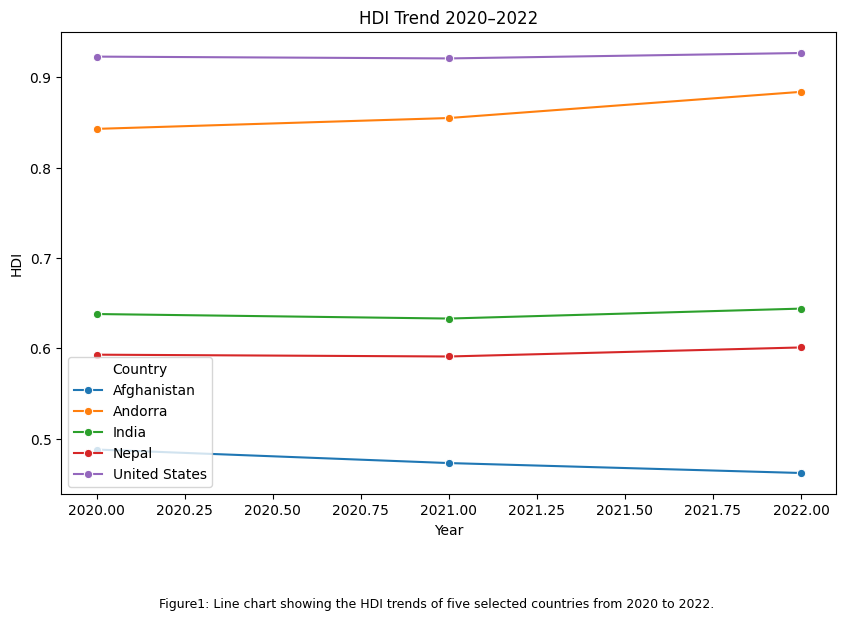

____________________________________________________________________


In [ ]:
#3. Visualization Tasks:
# A. Line Chart — HDI Trend (Country-Level):
countries = ["Afghanistan", "Andorra", "India", "Nepal", "United States"]

# since df is already filtered so no need to filter it again on the basis of year 2020 2021 2022
data= df[df['country'].isin(countries)]
plt.figure(figsize=(10,6))
sns.lineplot(data=data,
             x='year', # Use 'year' column for x-axis
             y='hdi',  # Use 'hdi' column for y-axis
             hue='country',  # Differentiate lines by 'country' with unique colors
             marker='o')
# Add a title to the plot
plt.title("HDI Trend 2020–2022")
plt.legend(title="Country")
# Label the x-axis as "YEAR"
plt.xlabel("Year")
# Label the y-axis as "HDI"
plt.ylabel("HDI")
plt.figtext(
    0.5, -0.08,
    "Figure1: Line chart showing the HDI trends of five selected countries from 2020 to 2022.",
    ha="center",
    fontsize=9
)
plt.show()

print("____________________________________________________________________")




# **In the above line chart we can observe following HDI trends:**

United states and Andorra: they are already very high and also good increase from 2020 to 2022. This means these countries are doing better and better.

India and Nepal: Both country shows a slight upward trend, meaning gradual improvement in living standards, education, and health.

Afghanistan: This country show a slight decrement in HDI in compare to previous years means this country is facing multiple problems in living standard, quality of food, education, health etc.

Overall pattern:

High-HDI countries improve slowly and steadily, Middle-HDI countries may improve gradually, while Low-HDI countries may are even decreasing in compare to prevoius year.

region average is 
                average
region  year          
Africa  2020  0.559566
        2021  0.557340
        2022  0.557037
America 2020  0.756086
        2021  0.753714
        2022  0.760971
Asia    2020  0.744667
        2021  0.743625
        2022  0.748729
Europe  2020  0.876476
        2021  0.878571
        2022  0.883119
Oceania 2020  0.709571
        2021  0.709000
        2022  0.709857
plotting bar plot


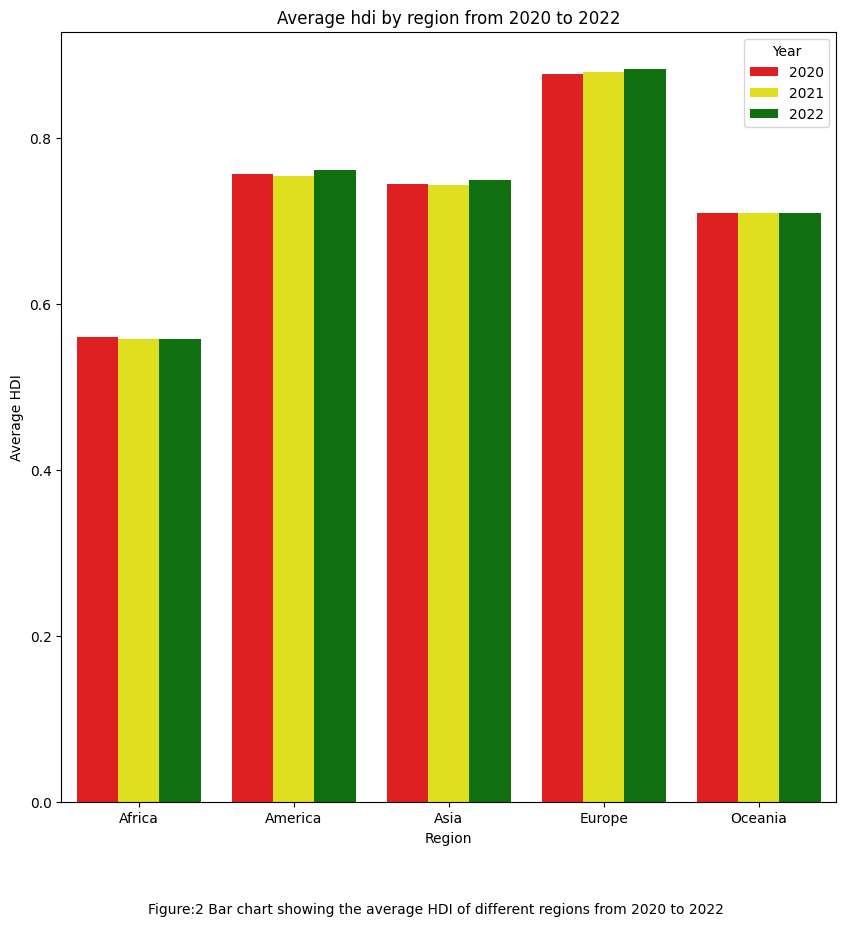

____________________________________________________________________


In [ ]:

#B. Generate Visualizations:
#bar chart
df['region'] = coco.convert(
    names=df['country'],
    to='continent'
)
# grouping by year and region
region_average= df.groupby(['region','year']).agg(average=('hdi','mean'))
print("region average is \n",region_average)

#plotting
print("plotting bar plot")
plt.figure(figsize=(10,10))
plt.title("Average hdi by region from 2020 to 2022")
sns.barplot(data=region_average,x='region',y='average',hue='year',palette={2020: 'red', 2021: 'yellow', 2022: 'green'}
)
plt.figtext(
    0.5, -0.002,
    "Figure:2 Bar chart showing the average HDI of different regions from 2020 to 2022",
    ha="center",
    fontsize=10
)
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.legend(title='Year')
plt.show()

print("____________________________________________________________________")


# **In the above Bar-Graph we can observer that:**

i. Highest average HDI:

Europe has highest avergae HDI for all three years.

ii. Lowest average HDI:

Africa has the lowest average HDI for all three years.

iv.Trends:

Africa region, show a downward trend thorughout the years, suggesting decline in HDI by 2022.

Other regions except Oceania, shows slight upward trends throughout the years which suggests that there is slow but steady improvement in HDI across regions.

Whereas, Ocenia shows that it has steady and constant HDI throughout the year 2020 to 2022, showing minor fluctuations.

v.Patterns and anomalies:

All regions follow expected patterns such as high HDI in Europe,moderate HDI in Asia, America, and Oceania, and low in Africa. Hence, has no anomalies in HDI in the years 2020 to 2022.

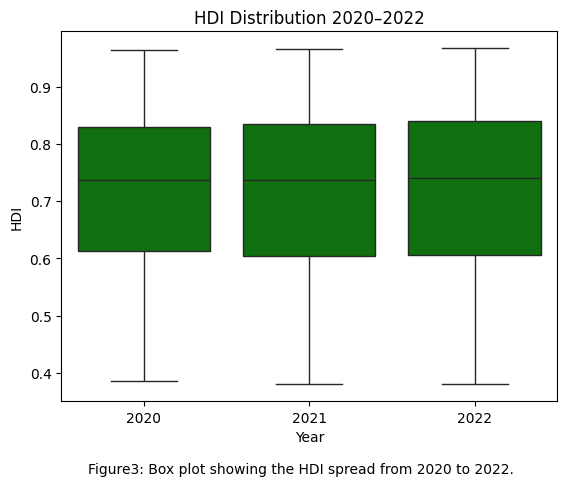

____________________________________________________________________


In [ ]:
#– Box Plot: HDI Distribution for 2020, 2021, and 2022

#filtering the dataset
filtered_data= dataframe[dataframe["year"].isin([2020,2021,2022])]
sns.boxplot(data=filtered_data,
            x='year',
            y='hdi',
            color='green'
            )
plt.title("HDI Distribution 2020–2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.figtext(
    0.5, -0.04,
    "Figure3: Box plot showing the HDI spread from 2020 to 2022.",
    ha="center",
    fontsize=10
)
plt.show()
#∗ Comment briefly on distribution differences.

'''
In the above box-plot we can observe that:

1. Median HDI: The median value("middle country") remains the same throughout the year, indicating a stable central tendency without major fluctuations. In short, the HDI hasnt changed much from 2022 to 2022 for the median value country.
Spread(IQR): the interquartile range can be observed to be smiliar across the years, which also suggests that the variation in HDI among coutreis hasn't changed significantly across the years.
Skewed data: The median is slightly above the center of the box, especially in 2020-2022.This suggests a slight negative (left) skew, meaning more countries are above the median, but the skew is not very pronounced
Anomalies: since there are no points outside the wiskers, it suggets that there are no outliers in the HDI for year 2020,2021, and 2022.

'''

print("____________________________________________________________________")

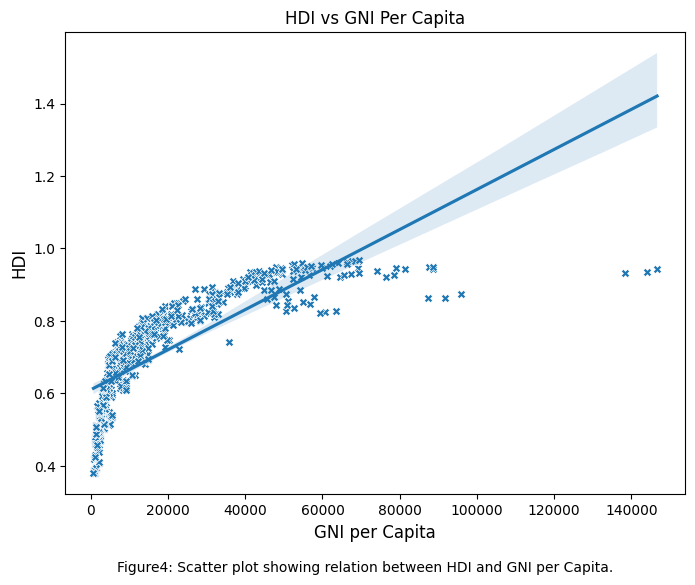

In [ ]:
"#Scatter Plot: HDI vs. GNI per Capita\n",
if 'gross_inc_percap' in df:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data= df,x='gross_inc_percap',y='hdi',marker='X')
  sns.regplot(data= df,
              x='gross_inc_percap',
              y='hdi',
              scatter=False)  #prints scatter line only\n",
  plt.title("HDI vs GNI Per Capita"),
  plt.xlabel("GNI per Capita",fontsize=12)

    # Label y-axis with HDI
  plt.ylabel("HDI",fontsize=12)
  plt.figtext(
        0.5, -0.02,
        "Figure4: Scatter plot showing relation between HDI and GNI per Capita.",
        ha="center",
        fontsize=10
    )
  plt.show()
else:
  print("GNI per captia is not available in dataset")


# **In the above scatter-plot we can observe that:**

1. Overall trend:There is a clear positive relationship—countries with higher GNI per capita generally have higher HDI.

2. Non-linear pattern: HDI increases rapidly at low income levels, then levels off as income rises, showing diminishing returns of income on human development.

3. Beyond roughly middle-high incomes, HDI clusters around 0.9-0.95, indicating that additional income contributes less to HDI gains.

4. Regression line insight: The straight regression line suggests a linear increase, but it overestimates HDI at very high income levels, where HDI hasnt exceed 1 HDI.

Anomalies/outliers:

A few very high-income countries show similar HDI to lower high-income countries.while, Some lower-income countries have relatively higher HDI than peers, suggesting the influence from other facotrs

In [ ]:
# Short Analysis Questions

# 1. Which countries show the greatest improvement in HDI from 2020 to 2022?

df= df[df["year"].isin([2020,2021,2022])]

# Pivot table to compare HDI across years
improvement_country = df.pivot_table(values='hdi', index='country', columns='year')

# Calculate change in HDI between 2020 and 2022
improvement_country['change_hdi'] = improvement_country[2022] - improvement_country[2020]

# Find the country with greatest improvement
greatest_improvement = improvement_country.sort_values(by='change_hdi', ascending=False).head(5)
print("Greatest improvement in HDI from 2020 to 2022:\n", greatest_improvement)

print("_________________________________________________________")
# 2. Did any countries experience a decline in HDI?
decline_country = improvement_country[improvement_country['change_hdi'] < 0]
print("\nCountries with decline in HDI:\n", decline_country.head(5))

print("_________________________________________________________")

# 3. Which region has the highest and lowest average HDI across these three years?

region_stats = df.groupby('region')['hdi'].mean().sort_values()
print("Region with the lowest mean HDI in these 3 years :\n", region_stats.head(1))
print("Region with the highest mean HDI in these years:\n", region_stats.tail(1))



print("_________________________________________________________")

# 4. Discussion: How global events (e.g., COVID-19 pandemic) may have affected HDI trends
discussion = """
Between 2020 and 2022, global HDI trends were heavily shaped by the COVID‑19 pandemic.
The crisis reduced life expectancy, disrupted education, and weakened economies, causing many countries to experience stagnation or decline in HDI.
Recovery was uneven, with wealthier nations rebounding faster than developing ones.it causes many deaths, economic crisis, health crisis which directly cause decline in HDI
Additional challenges such as inflation, climate events, and regional conflicts also contributed to slower human development during this period.
"""
print(discussion)

Greatest improvement in HDI from 2020 to 2022:
 year         2020   2021   2022  change_hdi
country                                    
Andorra     0.843  0.855  0.884       0.041
Azerbaijan  0.722  0.738  0.760       0.038
Ecuador     0.734  0.746  0.765       0.031
Maldives    0.737  0.753  0.762       0.025
Mexico      0.757  0.757  0.781       0.024
_________________________________________________________

Countries with decline in HDI:
 year                2020   2021   2022  change_hdi
country                                           
Afghanistan        0.488  0.473  0.462      -0.026
Angola             0.594  0.590  0.591      -0.003
Australia          0.948  0.949  0.946      -0.002
Belize             0.705  0.698  0.700      -0.005
Brunei Darussalam  0.827  0.824  0.823      -0.004
_________________________________________________________
Region with the lowest mean HDI in these 3 years :
 region
Africa    0.557975
Name: hdi, dtype: float64
Region with the highest mean HDI i

Problem 2

In [ ]:
#1. Create South Asia Subset:
#1.1 • Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"].

south_asianCountry= ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#filtering
HDI_SAC= dataframe[dataframe['country'].isin(south_asianCountry)]
HDI_SAC.to_csv("HDI_SouthAsia.csv", index=False)

print("________________________________________________________________________________________")


________________________________________________________________________________________


In [ ]:
#cleaning process
null_values= HDI_SAC.isnull().sum()
print(null_values)

#droppinng duplicates
HDI_SAC.drop_duplicates()


Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                          25
life_expectancy               0
pop_millions                  0
hdi_f                        43
hdi_m                        43
life_expec_f                  0
life_expec_m                  0
expec_yr_school               5
expec_yr_school_f             5
expec_yr_school_m             5
mean_yr_school               20
mean_yr_school_f             20
mean_yr_school_m             20
gross_inc_percap              0
gross_inc_percap_f           33
gross_inc_percap_m           33
gender_development           43
gender_inequality            38
secondary_education_f_%      20
secondary_education_m_%      20
seats_in_parliament_f_%      15
seats_in_parliament_m_%      15
labour_participation_f_%     33
labour_participation_m_%     33
co2_emission_tons             0
mat_footprint_percap_tons    33
dtype: int64


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965,0.366,82.841949,82.894043,5.777778,94.222222,33.48,72.93,0.931244,5.0224
5474,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962,0.369,80.170418,82.056427,5.333333,94.666667,34.40,72.93,0.980717,4.6892
5475,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960,0.370,83.963470,84.235222,5.381166,94.618834,31.96,71.80,0.949787,4.4117
5476,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943,0.377,80.645348,83.286453,5.381166,94.618834,29.68,70.69,0.924002,5.0605


In [ ]:
'''
handeling missing value for column with 10 or more missing values
while dropping rows with minimal missing values as they don't have sifficant impact on the dataset
'''
for column in HDI_SAC.columns:

  if null_values[column] > 10:
    #  using aggregraation to fill the mising values
    if HDI_SAC[column].dtypes in ["float64","int64"]:
      # for columns of datatype int and float we substitute the missing value with overall mean of the column
      HDI_SAC[column]=HDI_SAC[column].fillna(HDI_SAC[column].mean())
    elif HDI_SAC[column].dtypes == "object":
      # for columns of datatype object we substitute the missing value with mode of the column
      HDI_SAC[column]=HDI_SAC[column].fillna(HDI_SAC[column].mode())
  else:
    # for column less than 10 values missing , can be considered as negligible and is unlikely to significantly affect the analysis, so we can drop the column.
    HDI_SAC = HDI_SAC.dropna(subset=[column])

ranking the data in Descending order 
 country
Maldives       4424.124746
Sri Lanka      2502.612949
Bhutan         1878.321569
Pakistan       1184.282350
India          1151.101140
Bangladesh     1042.583232
Nepal           779.209282
Afghanistan     555.454413
Name: Composite_Score, dtype: float64
________________________________________________________________________________________
ranking South Asian country on the basis of Composite Score 
              Composite Score  Composite Rank
country                                     
Maldives         4424.124746             1.0
Sri Lanka        2502.612949             2.0
Bhutan           1878.321569             3.0
Pakistan         1184.282350             4.0
India            1151.101140             5.0
Bangladesh       1042.583232             6.0
Nepal             779.209282             7.0
Afghanistan       555.454413             8.0
________________________________________________________________________________________
top 5  
 

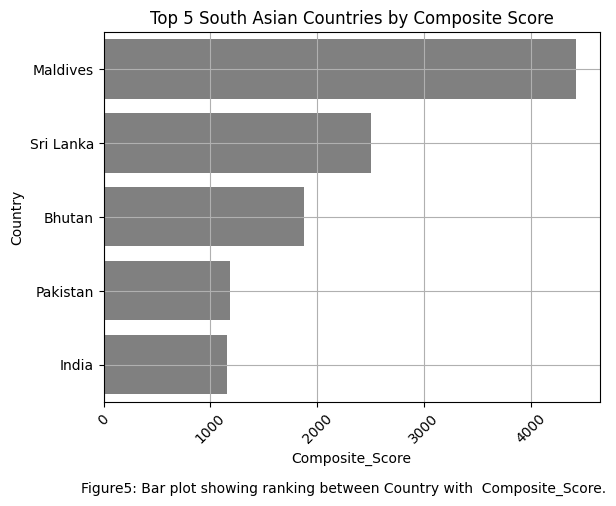

In [ ]:

#2 Composite Development Score:
HDI_SAC["Composite_Score"]= (0.3*HDI_SAC['life_expectancy']+0.3*HDI_SAC['gross_inc_percap'])

ranking_country=  HDI_SAC.groupby("country")['Composite_Score'].mean().sort_values(ascending=False)
print(f"ranking the data in Descending order \n {ranking_country}")
print("________________________________________________________________________________________")
# ranking on the basis of composite score
datas= pd.DataFrame({
    "Composite Score": ranking_country,
    "Composite Rank": ranking_country.rank(ascending=False),

})

print(f"ranking South Asian country on the basis of Composite Score \n {datas}")
print("________________________________________________________________________________________")


# plotting top 5 countries
#extracting top5 country
top5_Country= ranking_country.head(5)
#print(f"the top 5 countries are {top5_Country}")

top5_df = top5_Country.reset_index()
print("top 5  \n ",top5_df)
top5_df.columns = ['Country', 'Composite_Score']
#printing in horizontal
sns.barplot(data=top5_df,
            x='Composite_Score',
            y='Country',
            color='grey'
            )
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xticks(rotation=45)
plt.figtext(
        0.5, -0.08,
        "Figure5: Bar plot showing ranking between Country with  Composite_Score.",
        ha="center",
        fontsize=10
    )
plt.xlabel("Composite_Score")
plt.ylabel("Country")
plt.grid()
plt.show()



In [ ]:
#Compare the ranking of countries by Composite Score with their HDI ranking and discuss any differences.

composite_mean =  HDI_SAC.groupby("country")['Composite_Score'].mean().sort_values(ascending=False)
hdi_mean= HDI_SAC.groupby('country')['hdi'].mean().sort_values(ascending=False)
print(hdi_mean)
# ranking on the basis of Composite score and hdi
datas= pd.DataFrame({
    "Composite Score": composite_mean,
    "Composite Rank": composite_mean.rank(ascending=False),
    "HDI": hdi_mean,
    "HDI Rank": hdi_mean.rank(ascending=False)
})

print(f"ranking country \n {datas}")



country
Sri Lanka      0.715606
Maldives       0.682500
Bhutan         0.584302
India          0.541485
Bangladesh     0.531303
Nepal          0.504242
Pakistan       0.472545
Afghanistan    0.401030
Name: hdi, dtype: float64
ranking country 
              Composite Score  Composite Rank       HDI  HDI Rank
country                                                         
Afghanistan       555.454413             8.0  0.401030       8.0
Bangladesh       1042.583232             6.0  0.531303       5.0
Bhutan           1878.321569             3.0  0.584302       3.0
India            1151.101140             5.0  0.541485       4.0
Maldives         4424.124746             1.0  0.682500       2.0
Nepal             779.209282             7.0  0.504242       6.0
Pakistan         1184.282350             4.0  0.472545       7.0
Sri Lanka        2502.612949             2.0  0.715606       1.0


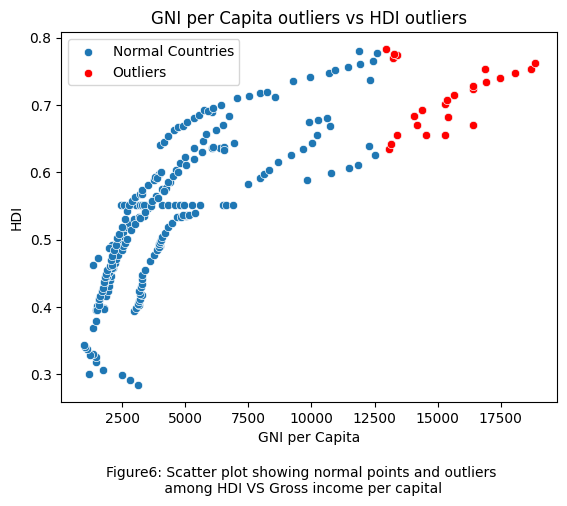

HDI Outliers:
 Empty DataFrame
Columns: [Unnamed: 0, iso3, country, year, hdi, life_expectancy, pop_millions, hdi_f, hdi_m, life_expec_f, life_expec_m, expec_yr_school, expec_yr_school_f, expec_yr_school_m, mean_yr_school, mean_yr_school_f, mean_yr_school_m, gross_inc_percap, gross_inc_percap_f, gross_inc_percap_m, gender_development, gender_inequality, secondary_education_f_%, secondary_education_m_%, seats_in_parliament_f_%, seats_in_parliament_m_%, labour_participation_f_%, labour_participation_m_%, co2_emission_tons, mat_footprint_percap_tons, Composite_Score]
Index: []

[0 rows x 31 columns]
GNI Outliers:
       Unnamed: 0 iso3   country  year    hdi  life_expectancy  pop_millions  \
3508        3509  MDV  Maldives  2000  0.635           70.876      0.282506   
3510        3511  MDV  Maldives  2002  0.642           73.291      0.292283   

         hdi_f    hdi_m  life_expec_f  ...  gender_inequality  \
3508  0.603814  0.65597        71.763  ...              0.493   
3510  0.61076

In [ ]:
#3. Outlier Detection:

#for hdi
Q1_hdi= HDI_SAC['hdi'].quantile(0.25)
Q3_hdi= HDI_SAC['hdi'].quantile(0.75)
IQR_hdi= Q3_hdi-Q1_hdi
LowerBound_hdi= Q1_hdi - 1.5 *IQR_hdi
UpperBound_hdi= Q3_hdi + 1.5 *IQR_hdi
hdi_outliers= HDI_SAC[(HDI_SAC['hdi']<LowerBound_hdi) | (HDI_SAC['hdi']>UpperBound_hdi) ]

#for gni outliers
Q1_gni= HDI_SAC['gross_inc_percap'].quantile(0.25)
Q3_gni= HDI_SAC['gross_inc_percap'].quantile(0.75)
IQR_gni= Q3_gni-Q1_gni
LowerBound_capita= Q1_gni - 1.5 *IQR_gni
UpperBound_capita= Q3_gni + 1.5 *IQR_gni
gni_outliers= HDI_SAC[(HDI_SAC['gross_inc_percap']<LowerBound_capita) | (HDI_SAC['gross_inc_percap']>UpperBound_capita) ]
# print(f"hdi outliers is \n {hdi_outliers.head(4)}")
# print(f"gni outliers is \n {gni_outliers.head(4)}")


outliers= pd.concat([hdi_outliers,gni_outliers])

#3.2 Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
#plotting

sns.scatterplot(data=HDI_SAC, #for normal
                x='gross_inc_percap',y='hdi',label='Normal Countries')

sns.scatterplot(data=outliers, # for Outliers
                x='gross_inc_percap',y='hdi',color='red',label='Outliers')



plt.figtext(
    0.5, -0.08,
    "Figure6: Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital",
    ha="center",
    fontsize=10
)

# add a caption just below the plot
plt.title("GNI per Capita outliers vs HDI outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()


#3.3 Discuss why the identified countries stand out as outliers.
print("HDI Outliers:\n", hdi_outliers.head(2))
print("GNI Outliers:\n", gni_outliers.head(2))
#maldives is indentified as Outliers becuase it has better or worst HDI values than others region.
#print(________________________________________________________________________________________)


Calculating Pearson Correlation with HDI:
the correlation between hdi and gender_development is 0.7466
the correlation between hdi and life_expectancy is 0.9331


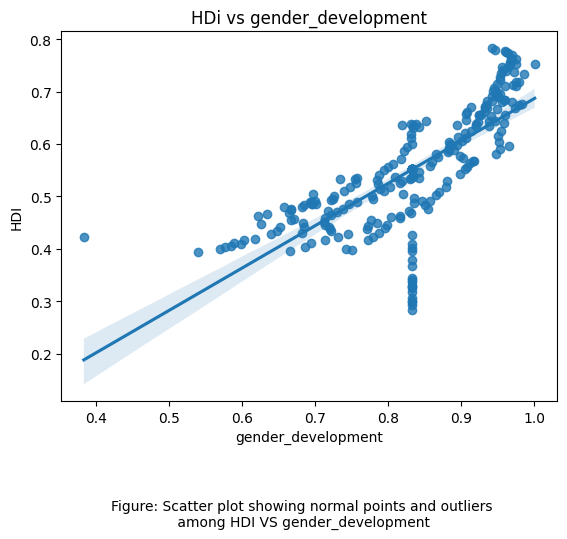

________________________________________________________________________________________________________________


In [ ]:
#4. Exploring Metric Relationships:
#4.1 Select two HDI components (e.g., Gender Development Index {"gender development"} and LifeExpectancy Index {"life expectancy"}).
hdi_components= ['gender_development','life_expectancy']

#4.2 Compute Pearson correlation of each metric with HDI.
print("Calculating Pearson Correlation with HDI:")
for metrics in hdi_components:
  Pearson_Correlation= HDI_SAC['hdi'].corr(HDI_SAC[metrics])
  print(f"the correlation between hdi and {metrics} is {Pearson_Correlation:.4f}")


#4.3 Create scatter plots with trendlines to visualize the relationships.
for m in hdi_components:
  sns.regplot(data=HDI_SAC,x=m,y='hdi') #regplot add Lines
  plt.title(f"HDi vs {m}")
  plt.ylabel("HDI")
  plt.xlabel(m)
  plt.figtext(
    0.5, -0.15,
    f"Figure: Scatter plot showing normal points and outliers\n among HDI VS {m}",
    ha="center",
    fontsize=10
)
  plt.show()
  print('________________________________________________________________________________________________________________')

#– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.
print('''The Pearson correlation analysis shows that life expectancy has the strongest positive relationship with HDI, indicating that countries with higher life expectancy tend to have higher human development.
 Gender development also shows a positive correlation with HDI, but the relationship is comparatively weaker. This suggests that while gender equality contributes to human development, health-related factors such as life expectancy play a more dominant role in determining HDI levels within South Asian countries.''')

# Based on the scatter plots:

1. Most strongly related to HDI:

    Life Expectancy Index is most strongly related to HDI since the points are tightly clustered around the trendline.This shows a strong, clear linear relationship with HDI.As life expectancy increases, HDI increases consistently with little variation.

2. Weakest relationship with HDI:
    Gender Development Index has weakest relationship with HDI since the points are more spread out around the trendline.This indicates greater variability and a weaker correlation with HDI compared to life expectancy.While HDI still increases as gender development improves, the relationship is less direct.

In [ ]:
#5. Gap Analysis:
#5.1 Create a new metric:
HDI_SAC['GNI HDI Gap']=HDI_SAC["gross_inc_percap"]-HDI_SAC["hdi"]

#5.2 Rank South Asian countries by GNI HDI Gap in descending and ascending order.
ranking_descending= HDI_SAC.groupby('country')['GNI HDI Gap'].mean().sort_values(ascending=False)
ranking_ascending= HDI_SAC.groupby('country')['GNI HDI Gap'].mean().sort_values()

postivie3= ranking_descending.head(3)
negative3= ranking_descending.tail(3)
print(f"top 3 positive gaps are \n {postivie3}")
print(f"top 3 negative gaps are \n {negative3}")




# Combine into one DataFrame
gap_plot = pd.concat([postivie3, negative3]).reset_index()
gap_plot.columns = ['Country', 'GNI_HDI_Gap']

# this will create a new column  called gap_type
gap_plot['Gap_Type'] = ['Positive Gap']*3 + ['Negative Gap']*3

# Plot in one figure
plt.figure(figsize=(8,6))
sns.barplot(
    data=gap_plot,
    x='Country',
    y='GNI_HDI_Gap',
    hue='Gap_Type',
    palette=  {'Positive Gap':'red','Negative Gap':'green'}
)

plt.title('Top 3 Positive and Negative GNI–HDI Gaps')
plt.xlabel('Country')
plt.ylabel('GNI–HDI Gap')
plt.figtext(
    0.5, -0.04,
    f"Figure8: Bar plot showing Top 3 Positive and Negative GNI–HDI Gaps",
    ha="center",
    fontsize=10
)
plt.savefig("Problem_1B_Bar_plot.png")
plt.legend(title='Gap Type')
plt.show()

#5.4 Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.
paragraph= '''this is becuase a country is economically rich but socially underdeveloped.
income is not effectively translated improvement into health, education, and others
. there can be limited quality of education, health care or governance challenges.
this analysis reinforces the idea that economic growth alone is insufficient and must be acompained by social investment to
improve human development.
'''
print(paragraph)


Problem 3
Comparative Regional Analysis: South Asia vs Middle East

In [ ]:
#1. Create Middle East Subset:

#1.1 Define the list of Middle East countries:
middle_east= ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [ ]:
#1.2 Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia andMiddle East.
#HDI_problem1B.csv is a filtered year from  2020 to 2022
df3= pd.read_csv('/content/HDI_problem1B.csv')
south_asia_df= df3[df3['country'].isin(south_asianCountry)].copy()
middle_east_df= df3[df3['country'].isin(middle_east)].copy()
south_asia_df.to_csv('HDI_SouthAsia_2020_2022.csv',index=False)
middle_east_df.to_csv('HDI_MiddleEast_2020_2022.csv',index=False)
print('saved sucessfully')

#print("_____________________________________________________________________________________________________________")

In [ ]:
#2. Descriptive Statistics:

#2.1 Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)across 2020–2022.

# calculating mean median and standard deviation for south asia and middle east
south_asia_mean=south_asia_df['hdi'].mean()
middle_east_mean=middle_east_df['hdi'].mean()
south_asia_std=south_asia_df['hdi'].std()
middle_east_std=middle_east_df['hdi'].std()
#displaying results
print(f"the mean of south asia is {south_asia_mean:.4f}")
print(f"the mean of middle east is {middle_east_mean:.4f}")
print(f"the std of south asia is {south_asia_std:.4f}")
print(f"the std of middle east is {middle_east_std:.4f}")

print('__________________________________________________________________________________________________________________________')
#2.2 Identify which region performs better on average.
# making dataframe and comparing on the basis of mean
summary = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [south_asia_mean, middle_east_mean],
    "Std HDI": [south_asia_std, middle_east_std]
})
print(f'\n {summary}')
if middle_east_mean>south_asia_mean:
    print("Middle east performs better in average")
else:
  print("\n south performs better in average")
print("______________________________________________________________________")




From above result, it is clear that Middle East region generally achieve higher HDI values, while, South Asia shows lower average HDI, highlighting development gaps.

Hence, Middle East countries perform better on average.

In [ ]:
#3. Top and Bottom Performers:
#3.1 Identify the top 3 and bottom 3 countries in each region based on HDI.
southasia_rank= south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
middleeast_rank= middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
southAsia_top= southasia_rank.head(3)
southAsia_bottom = southasia_rank.tail(3)
middleEast_top= middleeast_rank.head(3)
middleEast_bottom = middleeast_rank.tail(3)
# displaying the top 3 and bottom 3 results
print(f"the top 3 countries of south asia are \n  {southAsia_top}")
print(f"the least 3 countries of south asia are \n {southAsia_bottom}")
print(f"the top 3 countries of middle east are \n {middleEast_top}")
print(f"the least 3 countries of middle east are \n {middleEast_bottom}")


print('____________________________________________________________________________________________')

#3.2 Create a bar chart comparing these top and bottom performers across the two regions.
# creating a single dataframe to plot it in a group
comparision_df= pd.DataFrame({
    "South Asia Top":southAsia_top,
    "South Asia Bottom":southAsia_bottom,
    "Middle East Top":middleEast_top,
   "Middle East Bottom":middleEast_bottom,

})
comparision_df.plot(kind='bar', figsize=(10,7)) #plotting into groupped bar
plt.title("Top 3 and Bottom 3 Performers of South Asia Vs Middle East")
plt.ylabel("Average HDI")
plt.xlabel("Country")
plt.figtext(
    0.5, -0.15,
    "Figure 9: Plotting the top 3 bottom 3 countries \n of South Asia and Middle East on the basis of HDI performane",
    ha="center",
    fontsize=10
)
plt.xticks(rotation=45) #rotating the values for better readability
plt.legend(title= 'Top and bottom')
plt.grid()
plt.show()


# **Explanation**
In South Asia, the top countries are Maldives, Sri Lanka, and Bhutan, while the bottom countries are Afghanistan, Nepal, and Pakistan. In the Middle East, the top countries are the United Arab Emirates, Israel, and Bahrain, whereas the bottom countries are Yemen, Iraq, and Lebanon.


In [ ]:
# Compute min and max of gross_inc_percap
min_val = south_asia_df['gross_inc_percap'].min()
max_val = south_asia_df['gross_inc_percap'].max()

# Apply min-max scaling
south_asia_df['gni_scaled'] = (south_asia_df['gross_inc_percap'] - min_val) / (max_val - min_val)

# Compute min and max of life expectancy
min_val = south_asia_df['life_expectancy'].min()
max_val = south_asia_df['life_expectancy'].max()

# Apply min-max scaling
south_asia_df['life_expec_scaled'] = (south_asia_df['life_expectancy'] - min_val) / (max_val - min_val)

# Compute average values for each metric in south asia region
south_asia_avg = south_asia_df[["gender_development", "life_expec_scaled", "gni_scaled"]].mean().reset_index()
south_asia_avg.columns = ["Metric", "Value"]
south_asia_avg["Region"] = "South Asia"


# Compute min and max of gross_inc_percap
min_val = middle_east_df['gross_inc_percap'].min()
max_val = middle_east_df['gross_inc_percap'].max()

# Apply min-max scaling
middle_east_df['gni_scaled'] = (middle_east_df['gross_inc_percap'] - min_val) / (max_val - min_val)

# Compute min and max of life expectancy
min_val = middle_east_df['life_expectancy'].min()
max_val = middle_east_df['life_expectancy'].max()

# Apply min-max scaling
middle_east_df['life_expec_scaled'] = (middle_east_df['life_expectancy'] - min_val) / (max_val - min_val)

# Compute average values for each metric in Middle East region
middle_east_avg = middle_east_df[["gender_development", "life_expec_scaled", "gni_scaled"]].mean().reset_index()
middle_east_avg.columns = ["Metric", "Value"]
middle_east_avg["Region"] = "Middle East"

# Combine both regions
combined_avg = pd.concat([south_asia_avg, middle_east_avg], ignore_index=True)

# Plot grouped bar chart
plt.figure(figsize=(10,6))

sns.barplot(
    data=combined_avg,
    x="Metric",     # Metrics on x-axis
    y="Value",      # Average value
    hue="Region",   # Group by region
    palette=["skyblue", "green"]
)

plt.title("Comparison of Key Metrics: South Asia vs Middle East", fontsize=18)
plt.ylabel("Average Value",fontsize=18)
plt.xlabel("Metric",fontsize=18)

# Add a figure caption below the plot
plt.figtext(
    0.5, -0.11,
    '''Figure:10 Comparison of Key Metrics Gender Development, life Exepctancy,
     and GNI Index: South Asia vs Middle East''',
    ha="center",
    fontsize=10
)

#  downlaoding the plot to use in report
plt.savefig("Problem_3_Key_metric_comparison.png")

plt.legend(title="Region")
plt.tight_layout()
plt.show()



In [ ]:
# Step 3: Identify the greatest disparity

# Pivot the table to compare differences
pivot_avg = combined_avg.pivot(index="Metric", columns="Region", values="Value")
pivot_avg["Disparity"] = abs(pivot_avg["South Asia"] - pivot_avg["Middle East"])
pivot_avg = pivot_avg.sort_values(by="Disparity", ascending=False)

print("Metrics ranked by disparity between regions:")
print(pivot_avg)

# **Explanation**
The grouped bar chart shows that life expectancy has the greatest disparity between South Asia and the Middle East. In contrast, GNI per cap and gender development are more evenly matched across both regions, indicating that life expectancy is the most unevenly distributed development metric, while GNI and gender development show relatively balanced progress.

In [ ]:
#5. HDI Disparity:

#5.1 Compute the range (max – min) of HDI for each region.
#for south asia
southAsia_range= south_asia_df['hdi'].max()-south_asia_df['hdi'].min()
southAsia_cv=  south_asia_df['hdi'].std()/south_asia_df['hdi'].mean()

#for middle east
middleEast_range= middle_east_df['hdi'].max()-middle_east_df['hdi'].min()
middleEast_cv=  middle_east_df['hdi'].std()/middle_east_df['hdi'].mean()

print(f"south asia range {southAsia_range:.4f}")
print(f"south asia cv {southAsia_cv:.4f}")
print(f"middle east range {middleEast_range:.4f}")
print(f"middle east  cv {middleEast_cv:.4f}")

#Identify which region exhibits more variation in HDI.

#the middle east shows greater hdi disparity than south asia, as indicated by higher
# hdi range and coefficient of variance.

#print("______________________________________________________________________________________________")




# **Explanation**

The results show that South Asia has a lower range (0.3210) and a lower coefficient of variation (0.1537), meaning its countries are more clustered and relatively consistent in their development levels, though generally at lower values. In contrast, the Middle East displays a higher range (0.5130) and a higher coefficient of variation (0.1791), indicating greater disparities within the region. This reflects the presence of very high‑income states alongside lower‑income ones, producing more variation in development outcomes compared to the more uniform but modest levels observed in South Asia.

In [ ]:
#6. Correlation Analysis:
#6.1 For each region, compute correlations of HDI with:
southAsia_corr_gender=south_asia_df['hdi'].corr(south_asia_df['gender_development'])
southAsia_corr_life=south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

middleEast_corr_gender=middle_east_df['hdi'].corr(middle_east_df['gender_development'])
middleEast_corr_life=middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])


#6.2 Create scatter plots with trendlines for each correlation.
sns.regplot(data=south_asia_df , x='life_expectancy',y='hdi',label='south asia')
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy for South Asia")
plt.figtext(
    0.5, -0.05,
    "Figure 11: Scatter plot showing HDI vs Life Expectancy for South Asia",
    ha="center",
    fontsize=10
)
plt.legend()
plt.show()

print("__________________________________________________________________________________")

sns.regplot(data=south_asia_df , x='gender_development',y='hdi', color='green',label='south asia')
plt.xlabel("Gender Development")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development for South Asia")
plt.figtext(
    0.5, -0.05,
    "Figure 12: Scatter plot showing HDI vs Gender Development for South Asia",
    ha="center",
    fontsize=10
)
plt.legend()
plt.show()

print("__________________________________________________________________________________")


# **Interpretation of the strength and direction between HDI and life expectancy relationship for South Asia region:**

1.  Direction:
      
      the upward trendline indicates a positive reationship; as life expectancy improves/increases, HDI also increases
2.  Strength:
      
      The data points are tightly clustered around the trendline, suggesting Life expectancy to have a moderate positive influence on overall human development in South Asia, as measured by HDI.

# **Interpretation of the strength and direction between HDI and Gender Development relationship:**

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are loosely clustered around the trendline, suggesting a moderate to strong positive correlation. we can conclude that a country with low gender development can still have high HDI values.

In [ ]:

sns.regplot(data=middle_east_df , x='life_expectancy',y='hdi',color='red',label='middle east')
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy for Middle East")
plt.figtext(
    0.5, -0.05,
    "Figure 13: Scatter plot showing HDI vs Life Expectancy for Middle East",
    ha="center",
    fontsize=10
)
plt.legend()
plt.show()

print("__________________________________________________________________________________")

sns.regplot(data=middle_east_df , x='gender_development',y='hdi',color='purple',label='middle east')
plt.xlabel("Gender Development")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development for Middle East")
plt.figtext(
    0.5, -0.05,
    "Figure 14: Scatter plot showing HDI vs Gender Development for Middle East",
    ha="center",
    fontsize=10
)
plt.legend()
plt.show()

print("__________________________________________________________________________________")

#6.3 Interpret the strength and direction of these relationships.
#intrepretation are just below the plot

# **Interpretation of the strength and direction between HDI and Life expectancy relationship for middle east region:**

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are fairly closely clustered around the trendline, suggesting a moderately strong positive correlation between HDI and Life Expectancy which suggests that Life expectancy has a moderately strong positive influence on overall human development in Middle East, as measured by HDI.

# **Interpretation of the strength and direction between HDI and Gender Development relationship for middle east region:**

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are fairly loosely clustered around the trendline, suggesting a moderate to strong positive correlation. Gender development appears to have a moderately strong positive influence on overall human development in Middle East, as measured by HDI.

In [ ]:
#7. Outlier Detection:
#7.1 • Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region usingthe 1.5 × IQR rule.

#south asia hdi
sa_hdi_q1 = south_asia_df['hdi'].quantile(0.25)
sa_hdi_q3 = south_asia_df['hdi'].quantile(0.75)
sa_hdi_iqr = sa_hdi_q3 - sa_hdi_q1

sa_hdi_low = sa_hdi_q1 - 1.5 * sa_hdi_iqr
sa_hdi_up  = sa_hdi_q3 + 1.5 * sa_hdi_iqr

sa_hdi_outliers = south_asia_df[
    (south_asia_df['hdi'] < sa_hdi_low) |
    (south_asia_df['hdi'] > sa_hdi_up)
]
print(f"south asia hdi outliers \n{sa_hdi_outliers}")
#south asia gni
sa_gni_q1 = south_asia_df['gross_inc_percap'].quantile(0.25)
sa_gni_q3 = south_asia_df['gross_inc_percap'].quantile(0.75)
sa_gni_iqr = sa_gni_q3 - sa_gni_q1

sa_gni_low = sa_gni_q1 - 1.5 * sa_gni_iqr
sa_gni_up  = sa_gni_q3 + 1.5 * sa_gni_iqr

sa_gni_outliers = south_asia_df[
    (south_asia_df['gross_inc_percap'] < sa_gni_low) |
    (south_asia_df['gross_inc_percap'] > sa_gni_up)
]
print(f"south asia gni outliers \n{sa_gni_outliers}")


In [ ]:

#middle east hdi
me_hdi_q1 = middle_east_df['hdi'].quantile(0.25)
me_hdi_q3 = middle_east_df['hdi'].quantile(0.75)
me_hdi_iqr = me_hdi_q3 - me_hdi_q1

me_hdi_low = me_hdi_q1 - 1.5 * me_hdi_iqr
me_hdi_up  = me_hdi_q3 + 1.5 * me_hdi_iqr

me_hdi_outliers = middle_east_df[
    (middle_east_df['hdi'] < me_hdi_low) |
    (middle_east_df['hdi'] > me_hdi_up)
]
print(f"middle east hdi outliers \n{me_hdi_outliers}")

#middle east gni
me_gni_q1 = middle_east_df['gross_inc_percap'].quantile(0.25)
me_gni_q3 = middle_east_df['gross_inc_percap'].quantile(0.75)
me_gni_iqr = me_gni_q3 - me_gni_q1

me_gni_low = me_gni_q1 - 1.5 * me_gni_iqr
me_gni_up  = me_gni_q3 + 1.5 * me_gni_iqr

me_gni_outliers = middle_east_df[
    (middle_east_df['gross_inc_percap'] < me_gni_low) |
    (middle_east_df['gross_inc_percap'] > me_gni_up)
]

print(f"middle east gni outliers \n {me_gni_outliers}")


In [ ]:
plt.figure(figsize=(8,5)) #managing the figure size

# Normal points
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal Country'
)

# HDI outliers
sns.scatterplot(
    data=sa_hdi_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red',
    label='HDI Outliers'
)

# GNI outliers
sns.scatterplot(
    data=sa_gni_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='orange',
    label='GNI Outliers'
)
#adding caption just below the plot
plt.figtext(
    0.5, -0.15,
    "Figure 15: Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital for south asia region",
    ha="center",
    fontsize=10
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI Outliers ")
plt.legend()
plt.show()


In [ ]:
#for middle east
plt.figure(figsize=(8,5))

# Normal points
sns.scatterplot(
    data=middle_east_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal'
)

# HDI outliers
sns.scatterplot(
    data=me_hdi_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red',
    label='HDI Outliers'
)


# GNI outliers
sns.scatterplot(
    data=me_gni_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='purple',
    label='GNI Outliers'
)
plt.figtext(
    0.5, -0.08,
    "Figure 16: Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital for Middle East region",
    ha="center",
    fontsize=10
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.show()


# **• Discuss the significance of these outliers.**

---
FOR SOUTH ASIA
Using the 1.5×IQR rule, no outliers were identified in either HDI or GNI per Capita for South Asia. This indicates that South Asian countries have relatively similar levels of income and human development, with no country exhibiting extremely high or low values compared to the regional distribution. The absence of outliers suggests a relatively uniform development pattern within the region.

---
FOR MIDDLE EAST
in the Middle East, the detected GNI per capita outliers represent countries with either exceptionally high or exceptionally low income levels compared to the regional distribution. These extremes highlight the presence of resource‑rich economies as well as less affluent states, and emphasize that very high income does not always translate proportionally into higher human development outcomes.


---


